# Отчет к лабараторной работе №11

In [1]:
import sympy as sp
import math
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def print_table(columns_titles, ziped_rows):
    table = PrettyTable()
    table.field_names = columns_titles
    for row in ziped_rows:
        table.add_row(row)
    print(table)

## Начальные условия 

In [3]:
a = 0
b = 1
l = b - a
T = 0.1
k = 0.5

In [4]:
def g(x):
    return 10 * x

In [5]:
def f(x):
    return x

### Равномерная сетка 

In [6]:
def grid(M, N, h, tau):
    x_array = []
    t_array = []
    for i in range(N + 1):
        x_array.append(i * h)
    for j in range(M + 1):
        t_array.append(j * tau)
    return x_array, t_array

### Функции для решения краевой задачи

In [7]:
def explicit_difference_scheme(M, N, h, tau):
    x_array, t_array = grid(M, N, h, tau)
    
    y_array = np.zeros((N + 1, M + 1))
    for j in range(1, M + 1):
        y_array[0][j] = 0
        y_array[N][j] = g(t_array[j])
    for i in range(N + 1):
        y_array[i][0] = 0
        
    for j in range(0, M):
        for i in range(1, N):
            y_array[i][j + 1] = ((y_array[i - 1][j] - 2 * y_array[i][j] + y_array[i + 1][j]) * tau +\
                            f(t_array[j]) * 2 * tau * h **2 + y_array[i][j] * 2 * h ** 2) / h ** 2 / 2

            
    '''for j in range(0, M - 1):
        for i in range(0, N - 1):
            print(y_array[i][j], end = ' ')
        print()'''
    return x_array, t_array, y_array

In [8]:
def sweep_method(M, N, h, tau, y_row_j, t_j):
    P = []
    Q = []
    P.append(0)
    Q.append(0)
    for i in range(1, N):
        P.append(tau / (- tau * P[i - 1] + 2 * h ** 2 + 2 * tau))
        Q.append((2 * y_row_j[i - 1] * h ** 2 + tau * t_j * 2 * h ** 2 + tau * Q[i - 1]) / \
                       (- tau * P[i - 1] + 2 * h ** 2 + 2 * tau))
        
        
    y_inv = []
    #yn из последнего равенства системы
    y_inv.append(g(t_j + tau))
    for i in range(N - 1, 0, -1):
        y_inv.append(P[i - 1] * y_inv[N - i - 1] + Q[i - 1])
   
    y_inv.append(0)
    
    y_array = []
    for i in range(N, -1, -1):
        y_array.append(y_inv[i])
   
    return y_array

In [9]:
def implicit_difference_scheme(M, N, h, tau):
    x_array, t_array = grid(M, N, h, tau)
    
    y_array = np.zeros((N + 1, M + 1))
    for j in range(1, M + 1):
        y_array[0][j] = 0
        y_array[N][j] = g(t_array[j])
    for i in range(N + 1):
        y_array[i][0] = 0
    
    for j in range(1, M):
        temp = sweep_method(M, N, h, tau, y_array[:, j - 1], t_array[j - 1])
        for p in range(N):
            y_array[p][j] = temp[p]
        
        
            
    '''for j in range(0, M - 1):
        for i in range(0, N - 1):
            print(y_array[i][j], end = ' ')
        print()'''
    return x_array, t_array, y_array

### Функция для построения графика  

In [10]:
def y_for_shedule_when(coef, y_array):
    cur_y_array = []
    for i in range(N + 1):
        cur_y_array.append(y_array[i][coef])
    return cur_y_array

## Явная разностная схема 

In [11]:
while True:
#     h = ( b - a) / 10
    h = float(input("h = "))
    tau = float(input("tau = "))
    if tau <= 0.5 * (h ** 2 / k):
        break
    else:
        print("Условие устойчивости не выполнено!")

h = 0.005
tau = 0.002
Условие устойчивости не выполнено!
h = 0.05
tau = 0.002


In [12]:
N = int(l / h)
M = int(T / tau)

print("N = ", N)
print("M = ", M)

N =  20
M =  50


In [13]:
x_array, t_array, y_array = explicit_difference_scheme(M, N, h, tau)
print(y_array)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.00000000e-06 ... 1.52547357e-03
  1.59795278e-03 1.67384977e-03]
 [0.00000000e+00 0.00000000e+00 4.00000000e-06 ... 2.75214516e-03
  2.89564805e-03 3.04635759e-03]
 ...
 [0.00000000e+00 0.00000000e+00 4.00000000e-06 ... 5.58634196e-01
  5.73684461e-01 5.88784970e-01]
 [0.00000000e+00 0.00000000e+00 8.00400000e-03 ... 7.37685172e-01
  7.55182713e-01 7.72706327e-01]
 [0.00000000e+00 2.00000000e-02 4.00000000e-02 ... 9.60000000e-01
  9.80000000e-01 1.00000000e+00]]


### Графики решения при различных t 

In [14]:
y_coef_1 = y_for_shedule_when(10, y_array)
y_coef_2 = y_for_shedule_when(20, y_array)
y_coef_3 = y_for_shedule_when(40, y_array)
print_table(['xi', 'yi_1', 'yi_2', 'yi_3'], zip(x_array, y_coef_1, y_coef_2, y_coef_3))

+---------------------+------------------------+------------------------+-----------------------+
|          xi         |          yi_1          |          yi_2          |          yi_3         |
+---------------------+------------------------+------------------------+-----------------------+
|         0.0         |          0.0           |          0.0           |          0.0          |
|         0.05        | 0.00010181227520000002 | 0.00032749904269048556 | 0.0010504615276632071 |
|         0.1         |    0.00014910886912    | 0.0005234075533640688  | 0.0018274336308784092 |
| 0.15000000000000002 | 0.00016908137471999997 | 0.0006360306933939685  | 0.0024462124411047228 |
|         0.2         |    0.0001766232576     | 0.0006982916687466175  | 0.0030269791828386105 |
|         0.25        | 0.00017911526399999998 | 0.0007323279061318894  |  0.003715620816178264 |
| 0.30000000000000004 |    0.0001798132224     | 0.0007545473378595793  |  0.004711791067553697 |
| 0.3500000000000000

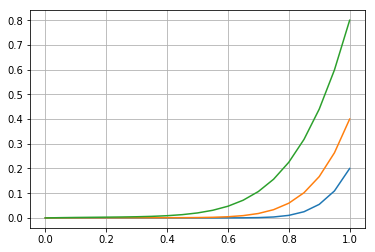

In [15]:
plt.plot(x_array, y_coef_1)
plt.plot(x_array, y_coef_2)
plt.plot(x_array, y_coef_3)
plt.grid()

### Графики решения при всех t 

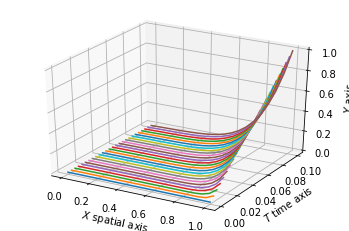

In [16]:
ax = plt.axes(projection = '3d')
ax.set_xlabel('$X$ spatial axis')
ax.set_ylabel('$T$ time axis')
ax.set_zlabel('$Y$ axis')

for k in range(0, int(T / tau) + 1, 2):
    y_coef = y_for_shedule_when(k, y_array)
    #plt.plot(x_array, y_coef)
    ax.plot3D(x_array, np.array([t_array[k]] * (N + 1)), y_coef)
plt.grid()

## Неявная разностная схема 

In [17]:
h = float(input("h = "))
tau = float(input("tau = "))

h = 0.05
tau = 0.002


In [18]:
N = int(l / h)
M = int(T / tau)

print("N = ", N)
print("M = ", M)

N =  20
M =  50


In [19]:
x_array, t_array, y_array = implicit_difference_scheme(M, N, h, tau)
print(y_array)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.64774842e-14 3.06225797e-06 ... 1.51022113e-04
  1.54239104e-04 0.00000000e+00]
 ...
 [0.00000000e+00 1.09920066e-03 2.27711348e-03 ... 5.81734132e-02
  5.93907268e-02 0.00000000e+00]
 [0.00000000e+00 4.68871126e-03 9.54029840e-03 ... 2.34632399e-01
  2.39527685e-01 0.00000000e+00]
 [0.00000000e+00 2.00000000e-02 4.00000000e-02 ... 9.60000000e-01
  9.80000000e-01 1.00000000e+00]]


In [20]:
y_coef_1 = y_for_shedule_when(10, y_array)
y_coef_2 = y_for_shedule_when(20, y_array)
y_coef_3 = y_for_shedule_when(40, y_array)
print_table(['xi', 'yi_1', 'yi_2', 'yi_3'], zip(x_array,y_coef_1, y_coef_2, y_coef_3))

+---------------------+------------------------+------------------------+------------------------+
|          xi         |          yi_1          |          yi_2          |          yi_3          |
+---------------------+------------------------+------------------------+------------------------+
|         0.0         |          0.0           |          0.0           |          0.0           |
|         0.05        |          0.0           |          0.0           |          0.0           |
|         0.1         | 2.8776465487816638e-05 | 6.094637267537829e-05  | 0.0001252861871132325  |
| 0.15000000000000002 | 3.949409469517485e-05  | 8.425867703920228e-05  | 0.0001737878420095462  |
|         0.2         | 5.894696064047015e-05  | 0.00012821767400103196 | 0.0002667591019297253  |
|         0.25        | 7.186854096954954e-05  | 0.00015839740108172754 | 0.00033145512569586824 |
| 0.30000000000000004 | 8.691738124424206e-05  | 0.00019511508389002908 | 0.00041151050429910944 |
| 0.350000

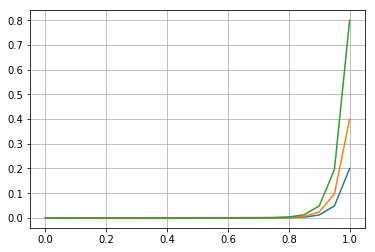

In [21]:
plt.plot(x_array, y_coef_1)
plt.plot(x_array, y_coef_2)
plt.plot(x_array, y_coef_3)
plt.grid()

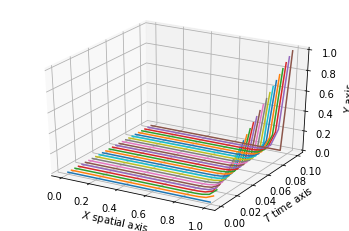

In [22]:
ax = plt.axes(projection = '3d')
ax.set_xlabel('$X$ spatial axis')
ax.set_ylabel('$T$ time axis')
ax.set_zlabel('$Y$ axis')

for k in range(0, int(T / tau) + 1, 2):
    y_coef = y_for_shedule_when(k, y_array)
    #plt.plot(x_array, y_coef)
    ax.plot3D(x_array, np.array([t_array[k]] * (N + 1)), y_coef)
plt.grid()